In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.models import Sequential
import os
from matplotlib import pyplot as plt

In [2]:
# Set the model directory
model_directory = 'models'

# Create the model directory if it doesn't exist
if not os.path.exists(model_directory):
    os.makedirs(model_directory)

In [3]:
# Set the hyperparameters
max_features = 10000
maxlen = 200
embedding_size = 128
rnn_size = 128
batch_size = 32
epochs = 10

In [4]:
# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
# Pad the sequences to a fixed length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [6]:
x_train[100]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    1,   13,
        244,    6,   87,  337,    7,  628, 2219,    5,   28,  285,   15,
        240,   93,   23,  288,  549,   18, 1455,  673,    4,  241,  534,
       3635, 8448,   20,   38,   54,   13,  258,   46,   44,   14,   13,
       1241, 7258,   12,    5,    5,   51,    9,   14,   45,    6,  762,
          7,    2, 1309,  328,    5,  428, 2473,   15,   26, 1292,    5,
       3939, 6728,    5, 1960,  279,   13,   92,  124,  803,   52,   21,
        279,   14,    9,   43,    6,  762,    7,  595,   15,   16,    2,
         23,    4, 1071,  467,    4,  403,    7,  628, 2219,    8,   97,
          6,  171, 3596,   99,  387,   72,   97,   12,  788,   15,   13,
        161,  459,   44,    4, 3939, 1101,  173,   

In [7]:
# Create the RNN model
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(SimpleRNN(rnn_size))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/10
782/782 [==============================] - 106s 134ms/step - loss: 0.6612 - accuracy: 0.5810 - val_loss: 0.6080 - val_accuracy: 0.6565
Epoch 2/10
782/782 [==============================] - 103s 132ms/step - loss: 0.5354 - accuracy: 0.7327 - val_loss: 0.5287 - val_accuracy: 0.7674
Epoch 3/10
782/782 [==============================] - 106s 136ms/step - loss: 0.5979 - accuracy: 0.6788 - val_loss: 0.6490 - val_accuracy: 0.6258
Epoch 4/10
782/782 [==============================] - 106s 136ms/step - loss: 0.5397 - accuracy: 0.7314 - val_loss: 0.6113 - val_accuracy: 0.6739
Epoch 5/10
782/782 [==============================] - 107s 137ms/step - loss: 0.4572 - accuracy: 0.7877 - val_loss: 0.5656 - val_accuracy: 0.7285
Epoch 6/10
782/782 [==============================] - 105s 134ms/step - loss: 0.3817 - accuracy: 0.8367 - val_loss: 0.5323 - val_accuracy: 0.7539
Epoch 7/10
782/782 [==============================] - 105s 135ms/step - loss: 0.3242 - accuracy: 0.8702 - val_loss: 0.5457 -

In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

782/782 [==============================] - 19s 25ms/step - loss: 0.5508 - accuracy: 0.7786
Test loss: 0.5507665872573853
Test accuracy: 0.7785599827766418


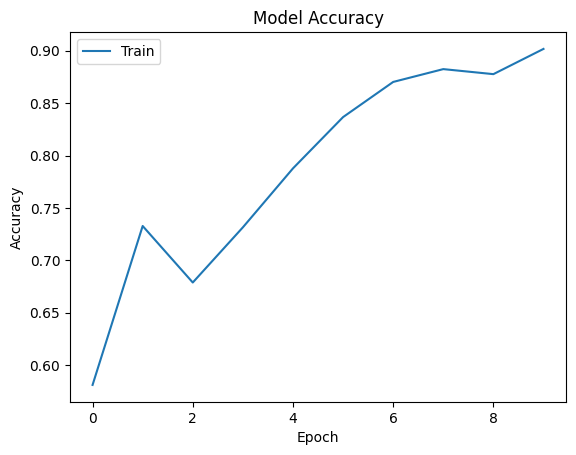

In [14]:
# Plot the accuracy from the training history
#plt.plot(history.history['binary_crossentropy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

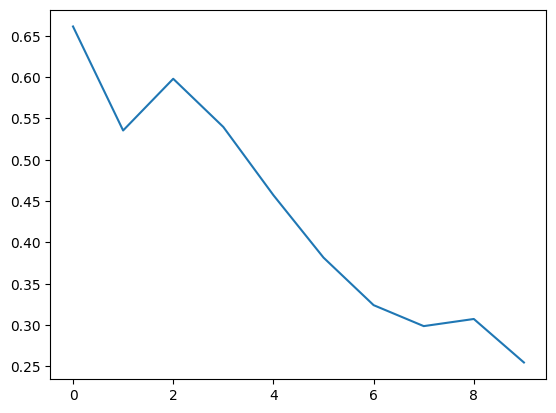

In [15]:
plt.plot(history.history['loss'])